<a href="https://colab.research.google.com/github/Galangaidil/big-data-data-mining/blob/main/UAS_BDDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UAS Big Data & Data Mining

- Anggota Kelompok :

1.   (5190411250) Galang Aidil Akbar
2.   (5190411256) Mardha Yuda Kurniawan
3.   (5190411292) Felina Nurul Rezpiningsih
4.   (5180411335) Aldi Rivananda

- Mata Kuliah : Big Data & Data Mining
- Kelas : D

---

## A. Dataset

Dataset yang digunakan yaitu Airline Passenger Satisfaction. Dataset tersebut telah di upload pada GitHub yang diambil yaitu link versi raw dari dataset. Tujuannya agar tidak melakukan upload file ke Google Collab, karena file yang diupload ke Google Collab akan di hapus setelah runtime dimatikan.

Berikut adalah link dataset train.csv melalui link Github :

In [ ]:
link = "https://raw.githubusercontent.com/Galangaidil/big-data-data-mining/main/train.csv"

## B. Installasi Pyspark

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# PENYELESAIAN SOAL

---
# 1.  Melakukan exploratory data analysis terhadap dataset
---

## C. Pembuatan DataFrame

Karena PySpark tidak dapat membaca file .csv melalui internet, maka solusinya adalah dengan cara membuat DataFrame menggunakan pandas, kemudian dimasukkan kedalam PySpark DataFrame.

In [ ]:
import pyspark.pandas as ps
import pandas as pd

pandas_df = pd.read_csv(link)

df = ps.from_pandas(pandas_df)

df.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


## D. Overview DataFrame

### D.1 Overview DataFrame

Tujuan melakukan Over View DataFrame yaitu untuk mengetahui jumlah baris dan kolom pada DataFrame

In [ ]:
rows = len(df)
columns = df.columns

print(f'Jumlah baris: {rows}')
print(f'Jumlah kolom: {len(columns)}')

Jumlah baris: 103904
Jumlah kolom: 25


Dari output tersebut maka dapat diketahui bahwa DataFrame tersebut memiliki 103904 baris dan 25 kolom.



### D.2 Check data yang kosong

Melakukan pengecekan data kosong pada DataFrame

In [ ]:
df.count()

Unnamed: 0                           103904
id                                   103904
Gender                               103904
Customer Type                        103904
Age                                  103904
Type of Travel                       103904
Class                                103904
Flight Distance                      103904
Inflight wifi service                103904
Departure/Arrival time convenient    103904
Ease of Online booking               103904
Gate location                        103904
Food and drink                       103904
Online boarding                      103904
Seat comfort                         103904
Inflight entertainment               103904
On-board service                     103904
Leg room service                     103904
Baggage handling                     103904
Checkin service                      103904
Inflight service                     103904
Cleanliness                          103904
Departure Delay in Minutes      

Berdasarkan dari pengecekan null values menggunakan count(), dapat diketahui bahwa kolom Arrival Delay in Minutes terdapat nilai null. sehingga perlu dilakukan penanganan missing value.



### D.3 Penanganan Missing Value

Agar tidak menemukan data yang bernilai kosong maka dilakukan penanganan missing value pada dataframe. Jenis penanganan missing value dengan menggunakan metode imputasi dengan nilai rata-rata (mean imputation)

In [ ]:
df['Arrival Delay in Minutes']=df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())

In [ ]:
df.count()

Unnamed: 0                           103904
id                                   103904
Gender                               103904
Customer Type                        103904
Age                                  103904
Type of Travel                       103904
Class                                103904
Flight Distance                      103904
Inflight wifi service                103904
Departure/Arrival time convenient    103904
Ease of Online booking               103904
Gate location                        103904
Food and drink                       103904
Online boarding                      103904
Seat comfort                         103904
Inflight entertainment               103904
On-board service                     103904
Leg room service                     103904
Baggage handling                     103904
Checkin service                      103904
Inflight service                     103904
Cleanliness                          103904
Departure Delay in Minutes      

Dari DataFrame diatas diketahui bahwa sudah tidak ada data yang kosong. Nilai pada kolom Arrival Delay in Minutes telah terisi dengan nilai rata-rata. Sehingga DataFrame tersebut dapat dilakukan eksekusi.

### D.4 Melihat Ringkasan DataFrame


Pada proses analisis deskriptif ini melakukan pembagian data numerik dan data kategorik.

* Data Numerik



In [ ]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.640909
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25965.000000,32531.000000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51943.000000,64853.000000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77925.000000,97356.000000,51.000000,1742.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Berdasarkan dari deskripsi pada data numerik tersebut terdapat beberapa hal yang ditemukan dan dapat disimpulkan yaitu :

1. Pada **kolom Ease of Online booking** dapat diketahui bahwa kolom tersebut memiliki nilai minimum sebanyak 0.00000 dan nilai maksimum yang didapat sebanyak 5.000000. Sedangkan rata-rata nilai yang didapat yaitu sebanyak 2.756901 yang dimana nilai rata-rata pada kolom tersebut kurang mendekati dengan nilai maksimum. Sehingga dapat disimpulkan bahwa kualitas pelayanan yang diberikan kurang maksimal dalam memberikan kemudahan untuk booking tiket secara online.

---

2.   Pada **kolom Seat comfort** dapat diketahui bahwa jumlah minimal yang diperoleh yaitu sebanyak 0.000000	dan maksimum 5.000000. Sedangkan rata-rata yang didapat yaitu 3.439396. Maka dapat disimpulkan bahwa kualitas kursi penumpang yang disediakan pada pesawat tersebut nyaman digunakan oleh penumpang bagi semua kalangan usia.

---

3. Pada **kolom Flight Distance** dapat diketahui bahwa nilai minimum yang diperoleh yaitu sebanyak 31.000000 dan nilai maksimum sebanyak 4983.000000, sedangkan rata-rata yang diperoleh yaitu 1189.448375. Maka dapat disimpulkan bahwa tidak banyak pesawat melakukan perjalanan dengan jarak penerbangan yang sangat jauh sehingga risiko penundaan waktu keberangkatan dan tiba pesawat rendah.

## E. Exploratory Data Analysis

Setelah melakukan proses eksplorasi dilakukan proses visualisasi data terhadap beberapa kolom pada DataFrame

### E.1 Usia penumpang (Distribution)

Proses ini dilakukan untuk mengetahui usia penumpang yang sering naik pesawat.

/usr/local/lib/python3.7/dist-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_numpy` loads all data into the driver's memory. It should only be used if the resulting NumPy ndarray is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


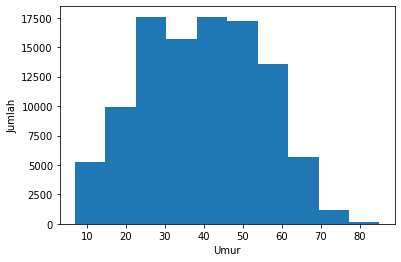

In [ ]:
from matplotlib import pyplot as plt

plt.hist(df['Age'].to_numpy())
plt.xlabel('Umur')
plt.ylabel('Jumlah')
plt.show()

/usr/local/lib/python3.7/dist-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_numpy` loads all data into the driver's memory. It should only be used if the resulting NumPy ndarray is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


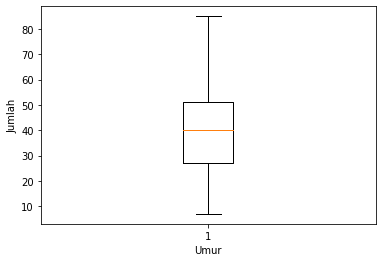

In [ ]:
from matplotlib import pyplot as plt

plt.boxplot(df['Age'].to_numpy())
plt.xlabel('Umur')
plt.ylabel('Jumlah')
plt.show()

Dari histogram chart dan boxplot chart tersebut dapat diketahui bahwa usia penumpang yang sering menaiki pesawat adalah pada usia 25 tahun sampai dengan usia 50 tahun. Sedangkan usia penumpang yang jarang menaiki pesawat adalah penumpang dengan usia 55 tahun keatas.

* Kesimpulan yang didapat yaitu bahwa usia penumpang yang sering naik pesawat adalah pada saat usia produktif.

### E.2 Kelas Penerbangan (Comparison)

Proses ini untuk mengetahui kelas penerbangan yang sering dinaiki oleh penumpang pesawat

/usr/local/lib/python3.7/dist-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_list` loads all data into the driver's memory. It should only be used if the resulting list is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)
/usr/local/lib/python3.7/dist-packages/pyspark/pandas/generic.py:647: UserWarning: We recommend using `Series.to_numpy()` instead.
  warnings.warn("We recommend using `{}.to_numpy()` instead.".format(type(self).__name__))
/usr/local/lib/python3.7/dist-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_numpy` loads all data into the driver's memory. It should only be used if the resulting NumPy ndarray is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


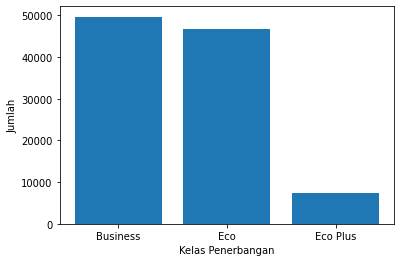

In [ ]:
from matplotlib import pyplot as plt

cls = df['Class'].value_counts()

index = cls.index.tolist()
values = cls.values.tolist()

plt.bar(index, values)
plt.xlabel('Kelas Penerbangan')
plt.ylabel('Jumlah')
plt.show()

Berdasarkan bar chart tersebut maka dapat diketahui bahwa penumpang pesawat sering naik pesawat yang kelas penerbanga Business atau Eco. sedangkan penumpang pesawat jarang menaiki pesawat kelas Eco Plus dengan jumlah data yang didapat yaitu < 10000 penumpang.

### E.3 Kepuasan Penumpang (Composition)

Proses ini untuk mengetahui tingkat kepuasan pada penumpang pesawat.

In [ ]:
df['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

Berdasarkan hasil perhitungan value pada kolom **'satisfaction'** dapat disimpulkan bahwa sebanyak 45025 penumpang merasa puas dengan kenyamanan ataupun pelayanan maskapai pesawat dan sebanyak 58879 penumpang merasa netral atau kurang puas.

/usr/local/lib/python3.7/dist-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_numpy` loads all data into the driver's memory. It should only be used if the resulting NumPy ndarray is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


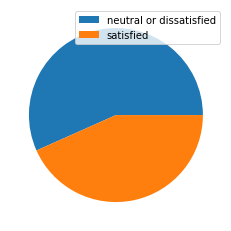

In [ ]:
from matplotlib import pyplot as plt

plt.pie(df['satisfaction'].value_counts().to_numpy())
plt.legend(['neutral or dissatisfied', 'satisfied'])
plt.show() 

Berdasarkan dari pie chart tersebut dapat disimpulkan bahwa banyak penumpang yang tidak puas dengan pelayanan maskapai pesawat.

### E.4 Hubungan antara Inflight entertainment dan Seat comfort (Relation)

Proses ini digunakan untuk mengetahui hubungan antara data kolom Inflight entertainment dengan kolom Seat comfort

/usr/local/lib/python3.7/dist-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_numpy` loads all data into the driver's memory. It should only be used if the resulting NumPy ndarray is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


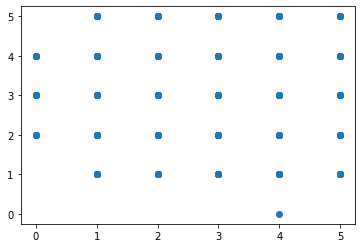

In [ ]:
from matplotlib import pyplot as plt

plt.scatter(df['Inflight entertainment'].to_numpy(), df['Seat comfort'].to_numpy())
plt.show()

Karena pembacaan data yang sulit dan kurang jelas letak ataupun kedalaman data yang disajikan maka menggunakan hexbin chart sebagai berikut.

/usr/local/lib/python3.7/dist-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_numpy` loads all data into the driver's memory. It should only be used if the resulting NumPy ndarray is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


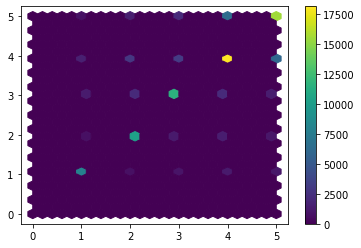

In [ ]:
from matplotlib import pyplot as plt

hb = plt.hexbin(df['Inflight entertainment'].to_numpy(), df['Seat comfort'].to_numpy(), gridsize=25)
cb = plt.colorbar(hb)
plt.show()

Berdasarkan hasil tersebut dapat disimpulkan bahwa hubungan antara Inflight entertainment dengan Seat comfort tersebut cukup dekat. Karena terdapat kurang lebih 17500 penumpang yang lebih memprioritaskan Inflight entertaiment.

* Maka dapat disimpulkan bahwa tingkat kenyamanan dan hiburan yang didapatkan sangat tinggi yaitu dengan jumlah sekitar lebih dari 4.



---
# 2.   Membuat model machine learning klasifikasi berdasarkan dataset menggunakan Spark
---

## Machine Learning Classification

Proses klasifikasi ini menggunakan dataset yang sama. Agar dapat mengubah tabel DataFrame menjadi tabel Spark maka dilakukan install PySpark yang sudah dilakukan sebelumnya. Berikut adalah hasil pemanggilan DataFrame yang ditampilkan sebanyak 5 data.

In [ ]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


## A. Preprocessing Data

Sebelum melakukan proses klasifikasi dilakukan preprocessing data dengan mengganti data kategorik menjadi data numerik pada kolom bertipe string atau objek yaitu kolom Gender, Customer Type, Type of Travel, Class dan Satisfaction. Selain itu proses ini juga dilakukan pengubahan (rename) kolom satisfaction menjadi kolom target.

In [ ]:
# ubah gender
df["Gender"] = df["Gender"].replace(["Female"], 0)
df["Gender"] = df["Gender"].replace(["Male"], 1)

# ubah Customer Type
df["Customer Type"] = df["Customer Type"].replace(["disloyal Customer"], 0)
df["Customer Type"] = df["Customer Type"].replace(["Loyal Customer"], 1)

# ubah Type of Travel
df["Type of Travel"] = df["Type of Travel"].replace(["Personal Travel"], 0)
df["Type of Travel"] = df["Type of Travel"].replace(["Business travel"], 1)

# Ubah Class
df["Class"] = df["Class"].replace(["Eco"], 0)
df["Class"] = df["Class"].replace(["Eco Plus"], 1)
df["Class"] = df["Class"].replace(["Business"], 2)

# ubah satisfaction
df["satisfaction"] = df["satisfaction"].replace(["neutral or dissatisfied"], 0)
df["satisfaction"] = df["satisfaction"].replace(["satisfied"], 1)

df.head()


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,1,1,13,0,1,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,1,5047,1,0,25,1,2,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,2,110028,0,1,26,1,2,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,3,24026,0,1,25,1,2,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,4,119299,1,1,61,1,2,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


Setelah mengganti nilai data huruf menjadi angka dilakukan perubahan jenis atau tipe data pada kolom-kolom yang telah disebutkan sebelumnya. Tujuannya yaitu agar DataFrame dapat diubah menjadi tabel Spark. Pada proses ini yaitu mengubah data object menjadi int. 

In [ ]:
df['Gender'] = df['Gender'].astype('int64')
df['Customer Type'] = df['Customer Type'].astype('int64')
df['Type of Travel'] = df['Type of Travel'].astype('int64')
df['Class'] = df['Class'].astype('int64')
df['satisfaction'] = df['satisfaction'].astype('int64')
df.rename(columns={'satisfaction': 'target'}, inplace=True)
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                 int64
Customer Type                          int64
Age                                    int64
Type of Travel                         int64
Class                                  int64
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

Setelah tipe data berhasil diubah menjadi int maka tabel tersebut dapat diubah menjadi tabel spark dengan proses sebagai berikut.

- Mengubah DataFrame menjadi Dataframe Pandas

In [ ]:
pdf = df.to_pandas()
pdf

/usr/local/lib/python3.7/dist-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,0,70172,1,1,13,0,1,460,3,4,...,5,4,3,4,4,5,5,25,18.0,0
1,1,5047,1,0,25,1,2,235,3,2,...,1,1,5,3,1,4,1,1,6.0,0
2,2,110028,0,1,26,1,2,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,3,24026,0,1,25,1,2,562,2,5,...,2,2,5,3,1,4,2,11,9.0,0
4,4,119299,1,1,61,1,2,214,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,0,0,23,1,0,192,2,1,...,2,3,1,4,2,3,2,3,0.0,0
103900,103900,73097,1,1,49,1,2,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,103901,68825,1,0,30,1,2,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,0
103902,103902,54173,0,0,22,1,0,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,0


## B. Vector Assembly 

Pada proses ini dilakukan pengubahan DataFrame Pandas menjadi Spark Dataframe diikuti dengan proses vector assembly.

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

dfml = spark.createDataFrame(pdf)

dfml.show()

+----------+------+------+-------------+---+--------------+-----+---------------+---------------------+---------------------------------+----------------------+-------------+--------------+---------------+------------+----------------------+----------------+----------------+----------------+---------------+----------------+-----------+--------------------------+------------------------+------+
|Unnamed: 0|    id|Gender|Customer Type|Age|Type of Travel|Class|Flight Distance|Inflight wifi service|Departure/Arrival time convenient|Ease of Online booking|Gate location|Food and drink|Online boarding|Seat comfort|Inflight entertainment|On-board service|Leg room service|Baggage handling|Checkin service|Inflight service|Cleanliness|Departure Delay in Minutes|Arrival Delay in Minutes|target|
+----------+------+------+-------------+---+--------------+-----+---------------+---------------------+---------------------------------+----------------------+-------------+--------------+---------------+-

Setelah Spark Dataframe berhasil diimplementasikan kemudian dilakukan proses vector assembly yaitu menyatukan semua data pada semua kolom menjadi satu kolom bernama kolom features.

In [ ]:
from pyspark.ml.feature import VectorAssembler

va = VectorAssembler(inputCols=['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'], outputCol='features')

df_assembled = va.transform(dfml)
df_assembled.show()

+----------+------+------+-------------+---+--------------+-----+---------------+---------------------+---------------------------------+----------------------+-------------+--------------+---------------+------------+----------------------+----------------+----------------+----------------+---------------+----------------+-----------+--------------------------+------------------------+------+--------------------+
|Unnamed: 0|    id|Gender|Customer Type|Age|Type of Travel|Class|Flight Distance|Inflight wifi service|Departure/Arrival time convenient|Ease of Online booking|Gate location|Food and drink|Online boarding|Seat comfort|Inflight entertainment|On-board service|Leg room service|Baggage handling|Checkin service|Inflight service|Cleanliness|Departure Delay in Minutes|Arrival Delay in Minutes|target|            features|
+----------+------+------+-------------+---+--------------+-----+---------------+---------------------+---------------------------------+----------------------+----

Setelah mendapatkan kolom features, kolom yang akan diproses pada tahap selanjutnya yaitu kolom target dengan kolom features. Untuk melakukan prediksi kolom target dilakukan pembagian data latih (training) dengan data uji (testing) dengan menggunakan metode split data

## C. Split Data

In [ ]:
train, test = df_assembled.randomSplit([0.8,0.2],seed = 100)

Pada proses pembagian data ini data training yang digunakan sebanyak 80% dan data testing yang digunakan sebanyak 20% dengan random seed sebanyak 100.

Setelah berhasil pembagian data training dan data uji dilakukan proses machine learning pada data training.

## D. Training

Proses training ini menggunakan metode logistic regression untuk melakukan klasifikasi pada data training dengan memberikan batasan iterasi sebanyak 5.

In [ ]:
from pyspark.ml.classification import LogisticRegression

logistic = LogisticRegression(featuresCol='features',labelCol='target', maxIter=5)

Kemudian dilakukan fitting pada data train

In [ ]:
modellg = logistic.fit(train)

Setelah proses data training selesai dilakukan pengecekan hasil akurasi pada training data.

In [ ]:
modellg.summary.accuracy

0.874416365824308

Hasil akurasi yang didapat yaitu 0.874416365824308 atau dapat disimpulkan bahwa sebanyak sekitar 87% prediksi tersebut benar.



## E. Testing

Proses ini untuk melihat model pada data uji yang sudah dibuat.

In [ ]:
pred = modellg.transform(test)
pred.show()

+----------+------+------+-------------+---+--------------+-----+---------------+---------------------+---------------------------------+----------------------+-------------+--------------+---------------+------------+----------------------+----------------+----------------+----------------+---------------+----------------+-----------+--------------------------+------------------------+------+--------------------+--------------------+--------------------+----------+
|Unnamed: 0|    id|Gender|Customer Type|Age|Type of Travel|Class|Flight Distance|Inflight wifi service|Departure/Arrival time convenient|Ease of Online booking|Gate location|Food and drink|Online boarding|Seat comfort|Inflight entertainment|On-board service|Leg room service|Baggage handling|Checkin service|Inflight service|Cleanliness|Departure Delay in Minutes|Arrival Delay in Minutes|target|            features|       rawPrediction|         probability|prediction|
+----------+------+------+-------------+---+--------------

Dari hasil testing tersebut dapat diliat hasil prediksi melalui kolom prediction.

## F. Evaluasi Data

Proses evaluasi ini menggunakan metode klasifikasi multiclass classification untuk memprediksi 3 class yang berbeda pada kolom target.

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

ev = MulticlassClassificationEvaluator()
ev.setPredictionCol('prediction')
ev.setLabelCol('target')
ev.evaluate(pred)

0.868955863682469

Berdasarkan hasil evaluasi tersebut nilai akurasi pada proses testing yang didapat yaitu 86%.

* Maka dapat disimpulkan bahwa selisih antara akurasi yang didapat pada proses training dan proses testing yaitu sebanyak 0.01%.

---
# 4. Link Video Singkat Presentasi Project : 
https://youtu.be/Yw3DUstiDsA
---
